<a href="https://colab.research.google.com/github/achmadrachmandika/PCVK/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama: Achmad Rachmandika Rizky Pratama
##Kelas: 3A
##NIM: 2041720125

Thresholding

Global Threshold

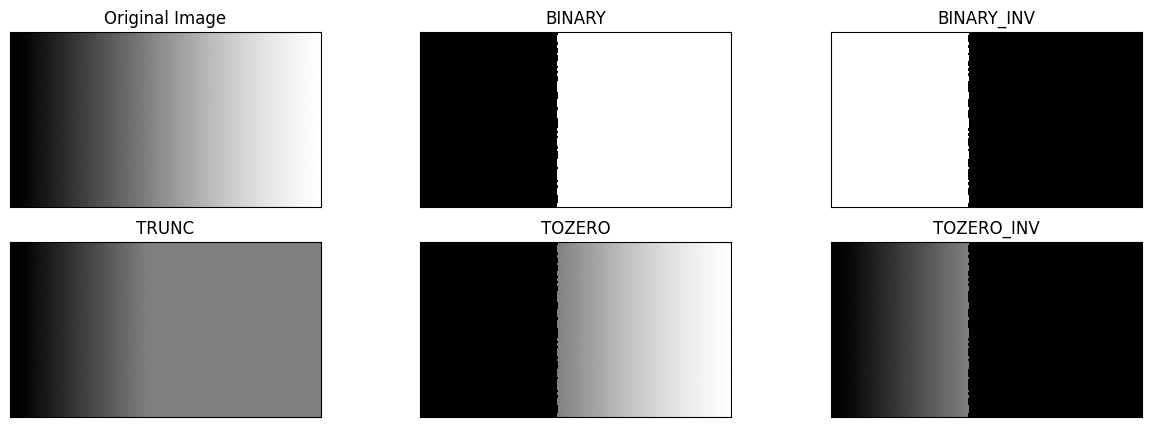

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week10/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain
#  itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Adaptive Threshold

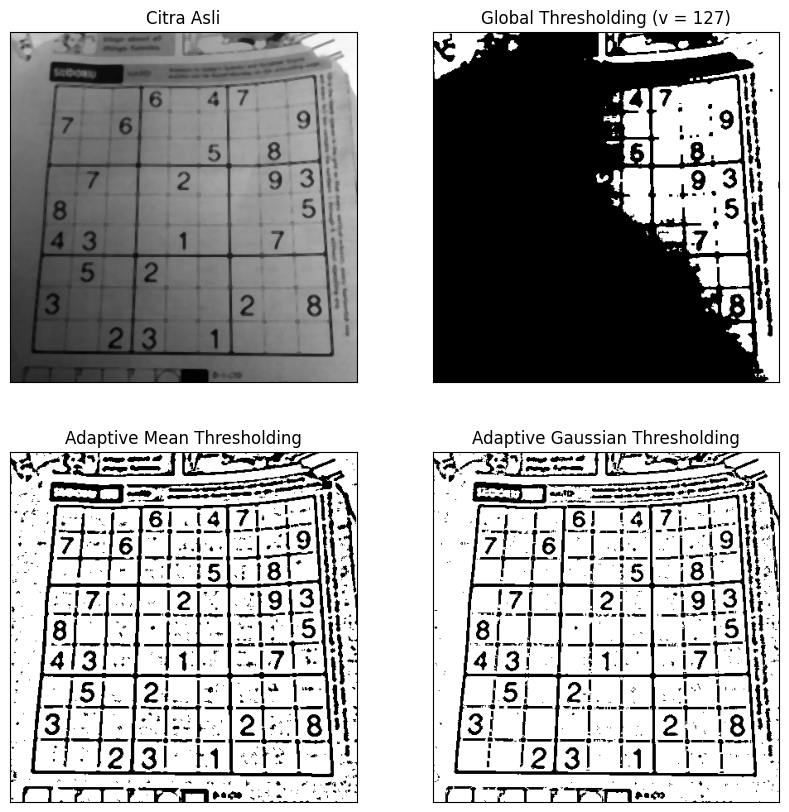

In [3]:
filename = ('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week10/image_thres/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

Otsu's Threshold

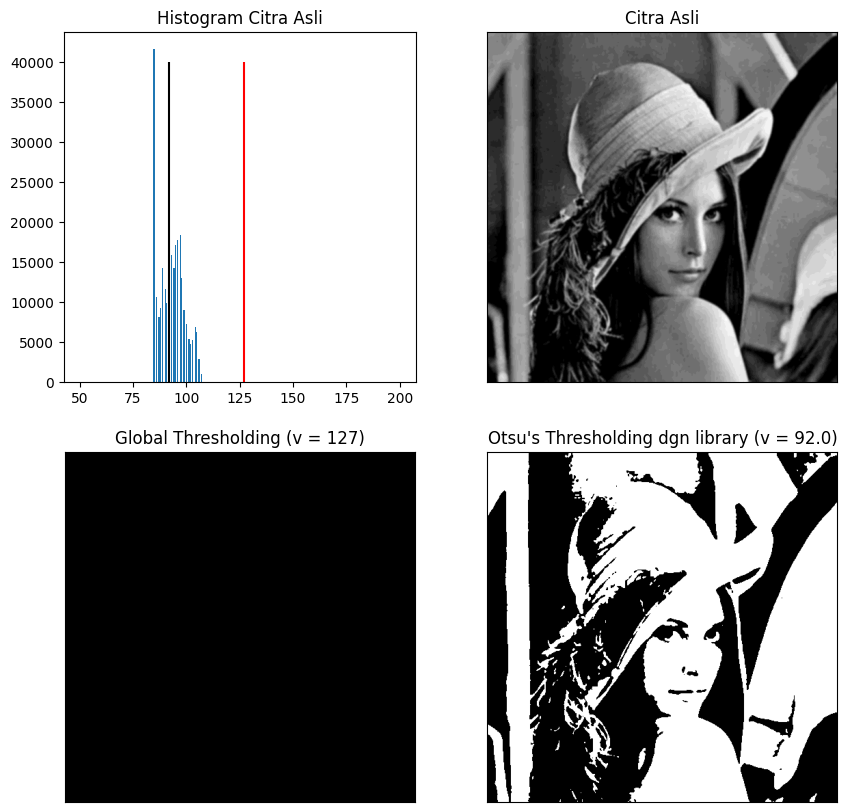

In [4]:
# Dengan Library
filename = ('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week10/image_thres/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjuka
# n threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukk
# an threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

Gaussian Filter

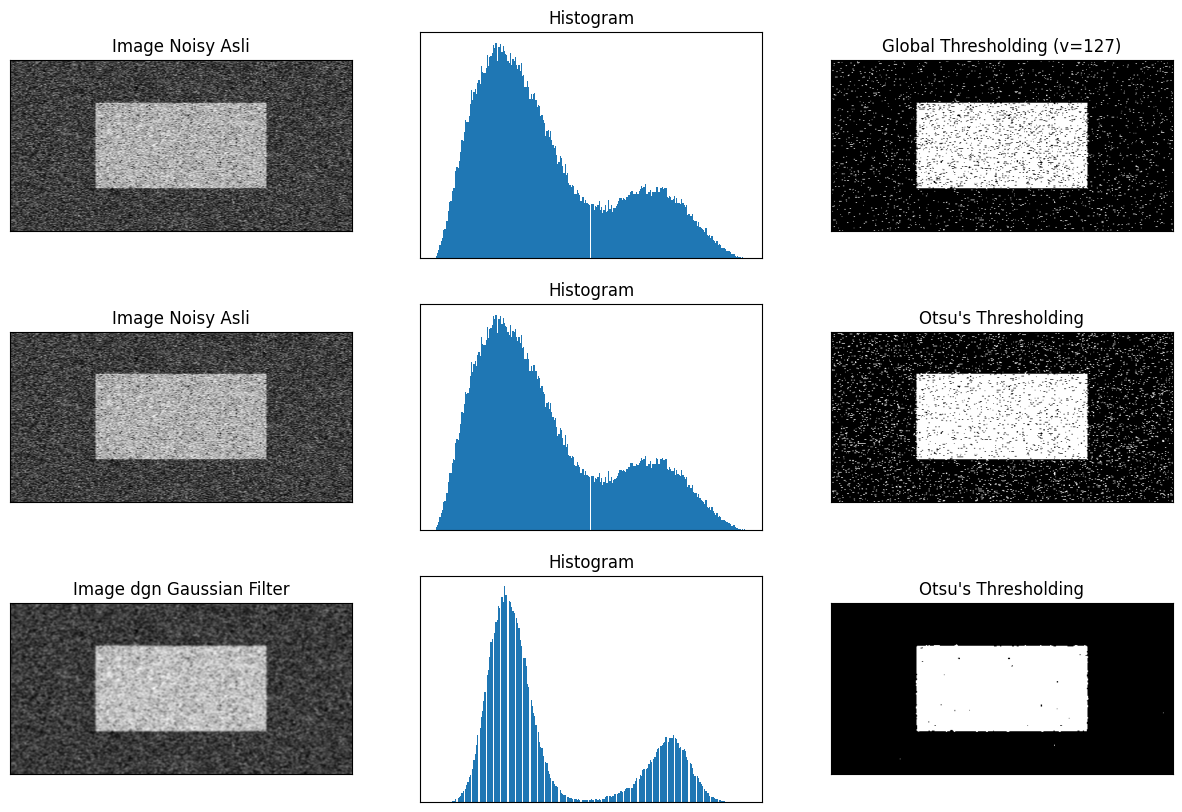

In [5]:
filename = ('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week10/image_thres/noisy2.png')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding", 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

Segmentasi Citra menggunakan K-Means

(<Axes: >, <matplotlib.image.AxesImage at 0x79231ef9e890>)

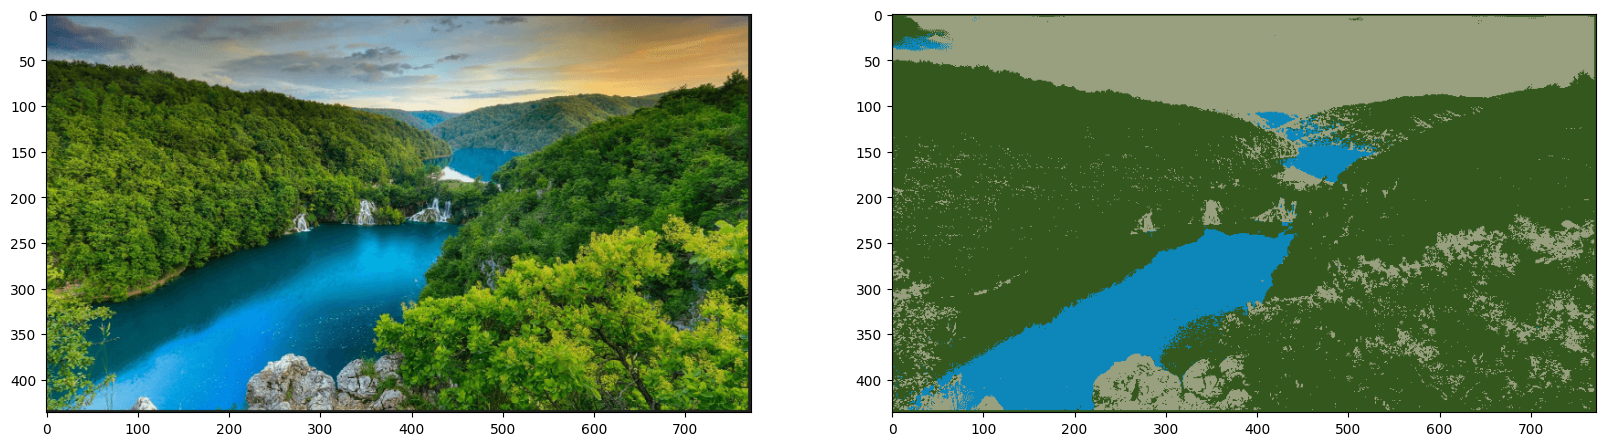

In [6]:
filename = ('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week10/image_thres/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# '''
# kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
# kan, sedangkan image aslinya adalah array 3D
# selanjutnya kita perlu melakukan flattening array image masukan
# '''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
# '''
# syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
# banyak pergeseran posisi antara interasi sekarang
# dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
# kita akan hentikan iterasi saat jumlah iterasi = 100
# atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
# rasi sebelumnya) < 0.2
# '''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# '''
# jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
#  putih/orange). untuk percobaan ini kita akan gunakan
# 3 cluster untuk image ini
# '''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)


(<Axes: >, <matplotlib.image.AxesImage at 0x79231ef68bb0>)

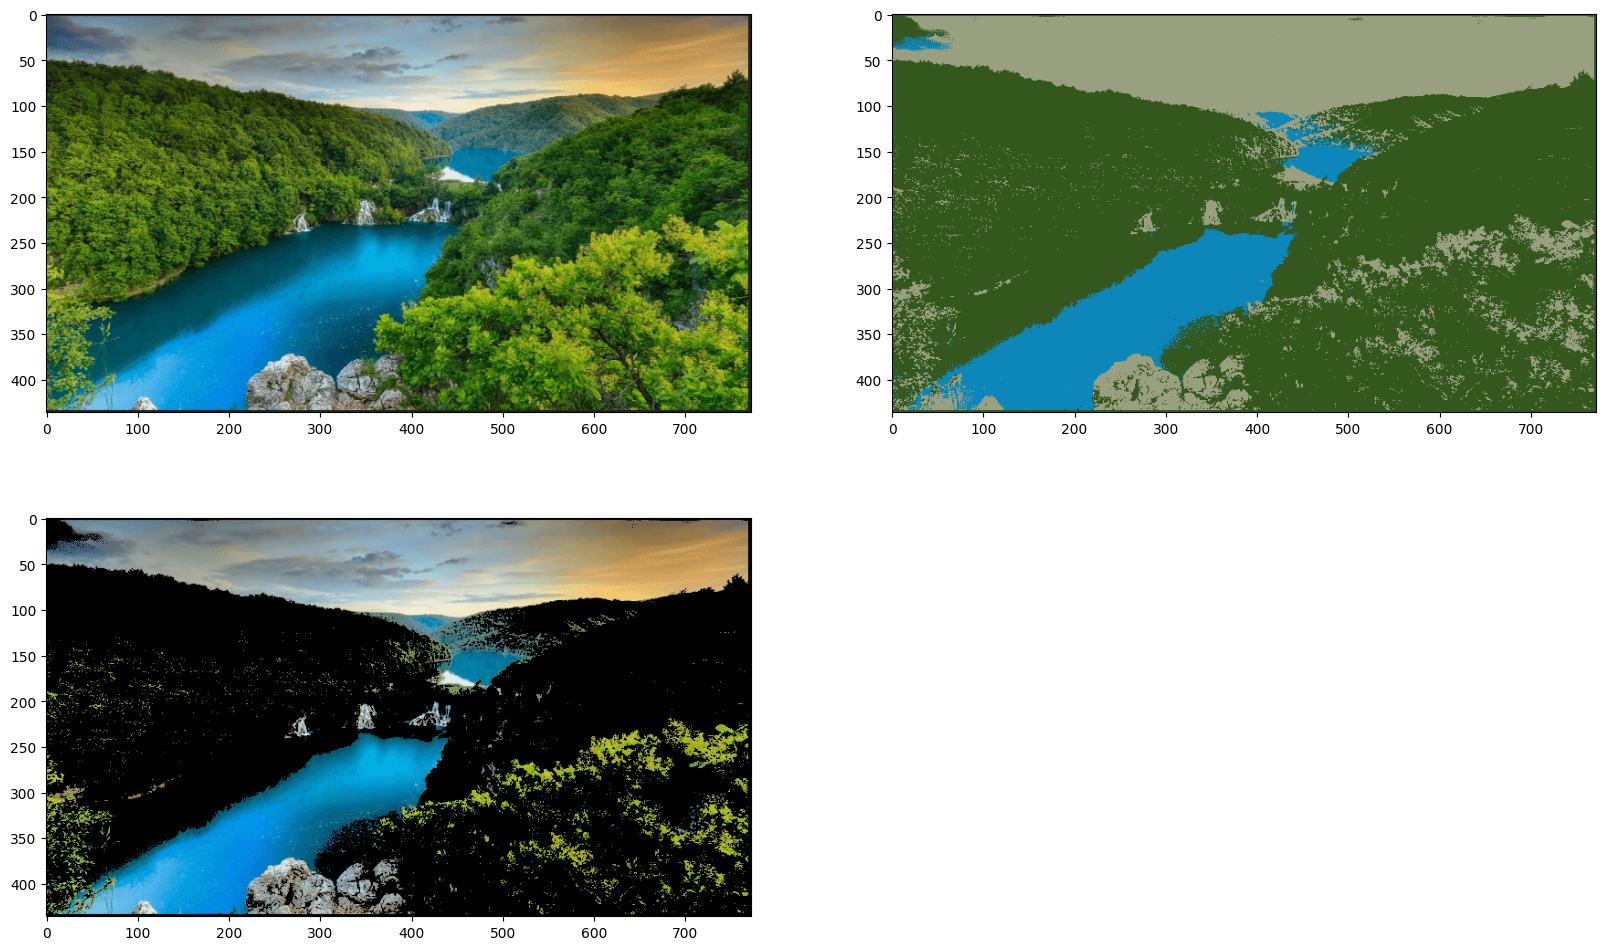

In [7]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

##Tugas

In [8]:
!pip install pytesseract

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.


In [9]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

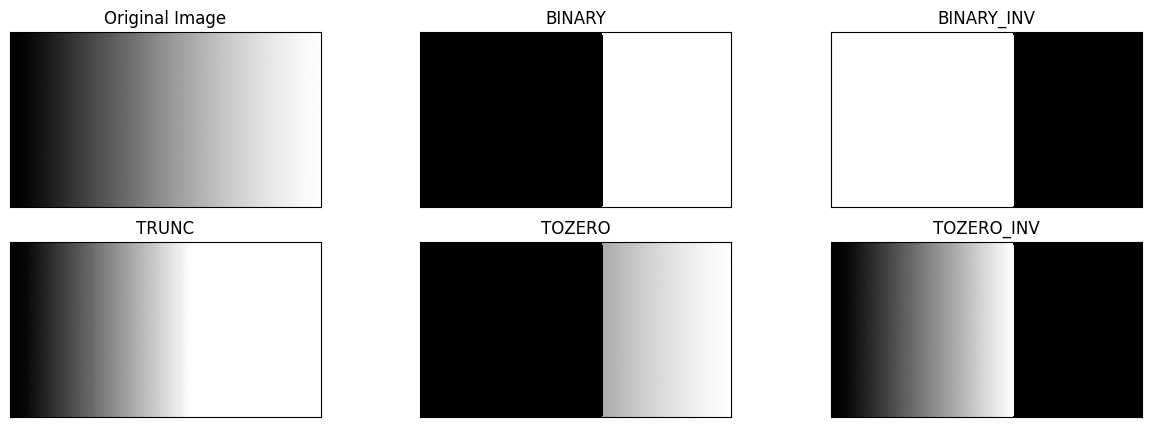

In [10]:
# Membaca gambar
filename = '/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week10/image_thres/gradient.jpg'
img = cv.imread(filename)

# Konversi gambar ke citra grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menggunakan threshold yang ditentukan (170)
threshold_value = 170

# Membuat citra hasil thresholding
thresh_binary = np.zeros_like(gray_img)
thresh_binary_inv = np.zeros_like(gray_img)
thresh_trunc = np.zeros_like(gray_img)
thresh_tozero = np.zeros_like(gray_img)
thresh_tozero_inv = np.zeros_like(gray_img)

# Melakukan thresholding secara manual
rows, cols = gray_img.shape
for i in range(rows):
    for j in range(cols):
        if gray_img[i, j] > threshold_value:
            thresh_binary[i, j] = 255
            thresh_binary_inv[i, j] = 0
            thresh_trunc[i, j] = threshold_value
            thresh_tozero[i, j] = gray_img[i, j]
            thresh_tozero_inv[i, j] = 0
        else:
            thresh_binary[i, j] = 0
            thresh_binary_inv[i, j] = 255
            thresh_trunc[i, j] = gray_img[i, j]
            thresh_tozero[i, j] = 0
            thresh_tozero_inv[i, j] = gray_img[i, j]

# Menyiapkan judul dan gambar-gambar hasil thresholding
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

# Menampilkan gambar-gambar hasil thresholding
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

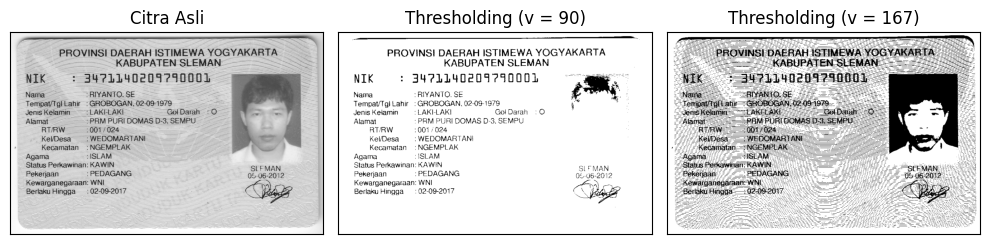

In [11]:
# Membaca gambar
filename = '/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp.png'
img = cv.imread(filename, 0)

# Menggunakan threshold 90 secara manual
thresh_value_90 = 90
thresh_manual_90 = np.zeros_like(img)
thresh_manual_90[img >= thresh_value_90] = 255

# Menggunakan threshold 167 secara manual
thresh_value_167 = 167
thresh_manual_167 = np.zeros_like(img)
thresh_manual_167[img >= thresh_value_167] = 255

# Menyiapkan judul dan citra-citra hasil thresholding
titles = ['Citra Asli', 'Thresholding (v = 90)', 'Thresholding (v = 167)']
images = [img, thresh_manual_90, thresh_manual_167]

# Menampilkan citra-citra hasil thresholding
plt.figure(figsize=(10, 6))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

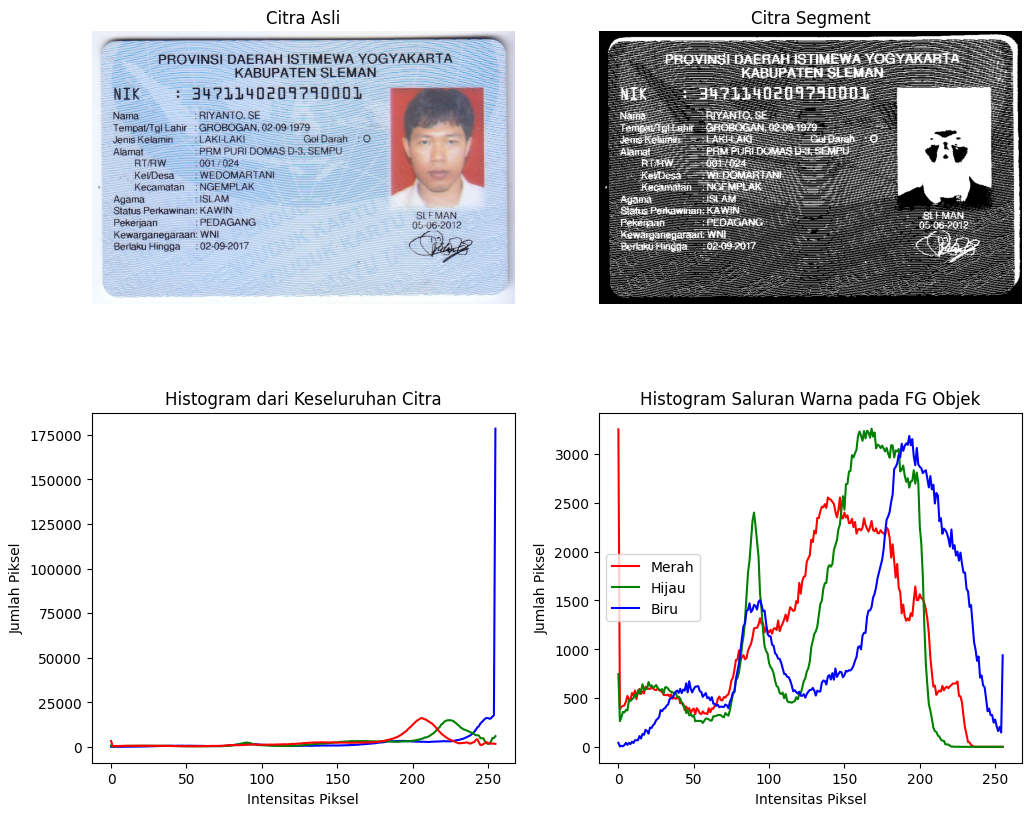

In [12]:
img = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp.png')
gray_img = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp.png', 0)

ret, thresholded = cv.threshold(gray_img, 200, 255, cv.THRESH_BINARY)
foreground = cv.bitwise_not(thresholded)

# Buat mask untuk citra tersegmentasi (foreground)
mask = thresholded > 0

# Memisahkan saluran warna
b, g, r = cv.split(img)

# Hitung histogram pada citra keseluruhan
hist_full_b = cv.calcHist([b], [0], None, [256], [0, 256])
hist_full_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_full_r = cv.calcHist([r], [0], None, [256], [0, 256])

# Hitung histogram pada citra tersegmentasi (foreground) untuk masing-masing saluran warna
hist_red = cv.calcHist([r], [0], foreground, [256], [0, 256])
hist_green = cv.calcHist([g], [0], foreground, [256], [0, 256])
hist_blue = cv.calcHist([b], [0], foreground, [256], [0, 256])

# Tampilkan citra asli
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis("off")

# Tampilkan citra tersegmentasi (foreground)
plt.subplot(222)
plt.imshow(foreground, cmap='gray')
plt.title('Citra Segment')
plt.axis("off")

# Tampilkan histogram pada citra keseluruhan
plt.subplot(223)
plt.plot(hist_full_b, color='blue', label='Merah')
plt.plot(hist_full_g, color='green', label='Hijau')
plt.plot(hist_full_r, color='red', label='Biru')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Tampilkan histogram pada citra tersegmentasi (foreground) untuk masing-masing saluran warna
plt.subplot(224)
plt.plot(hist_red, color='red', label='Merah')
plt.plot(hist_green, color='green', label='Hijau')
plt.plot(hist_blue, color='blue', label='Biru')
plt.title('Histogram Saluran Warna pada FG Objek')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

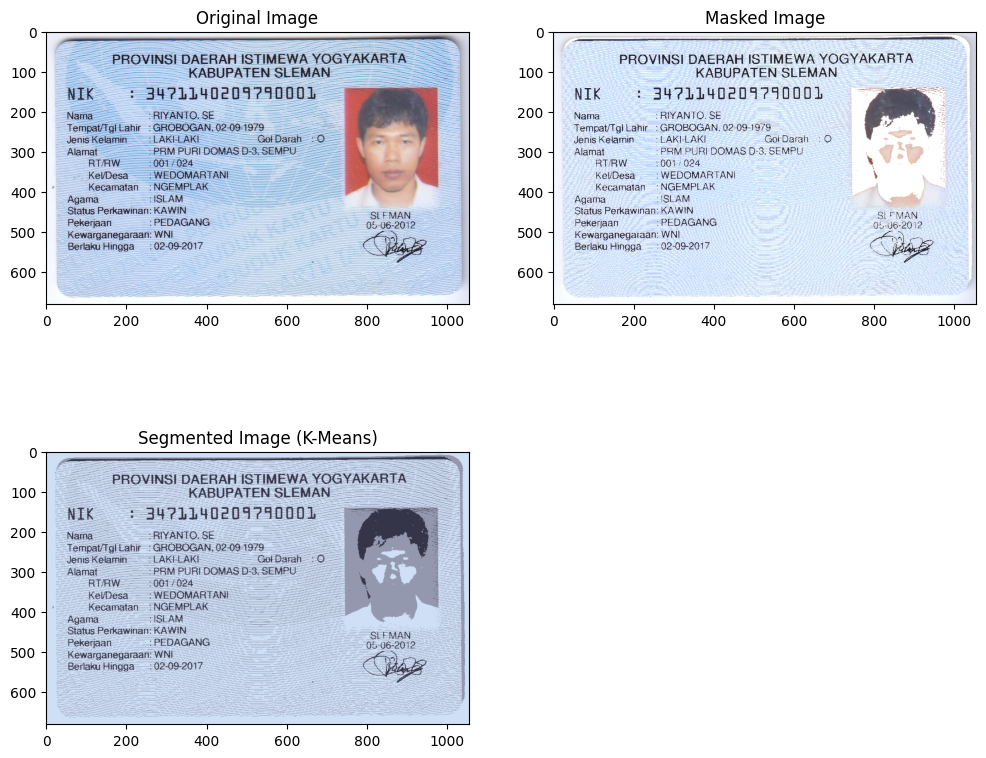

In [13]:
from sklearn.cluster import KMeans

# Load the image
img = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Meratakan nilai piksel
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# # Mendefinisikan kriteria dan jumlah clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3

# Implementasi K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi centers ke integer
centers = np.uint8(centers)

# Meratakan array label
labels = labels.flatten()

# Membuat masked image dengan mengubah satu cluster menjadi putih
masked_image = np.copy(img_rgb)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img_rgb.shape)

# Mengonversi gambar tersegmentasi kembali ke bentuk asli
segmented_image = centers[labels].reshape(img_rgb.shape)

# Menampilkan original image, segmented image, dan masked image
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

#TUGAS
mengimplementasikan thresholding dengan beberapa metode yang
telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

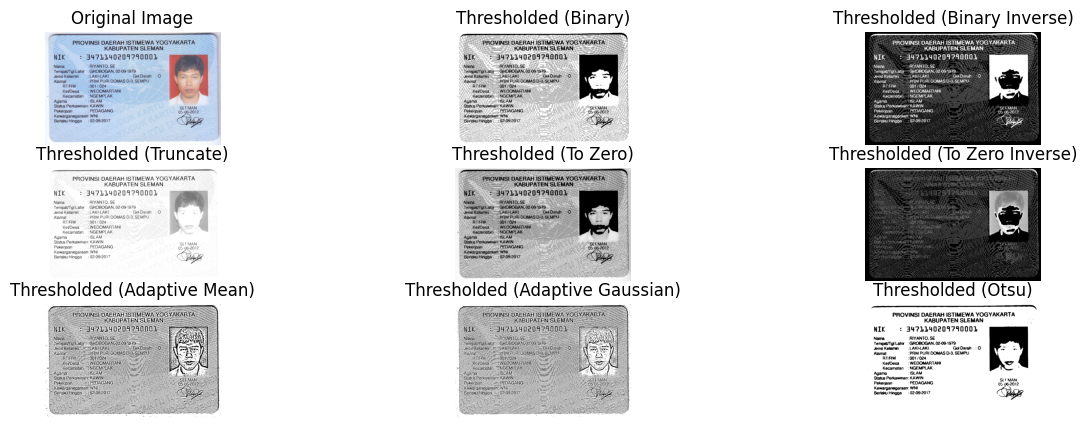

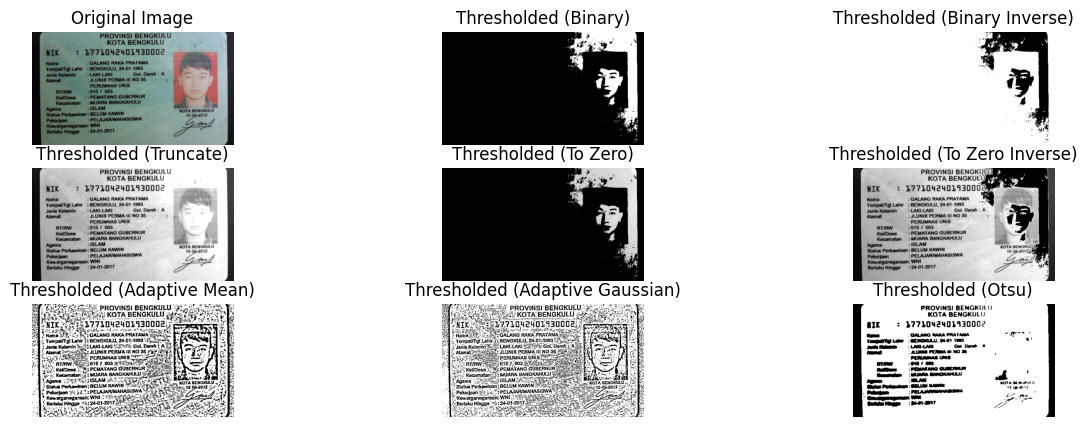

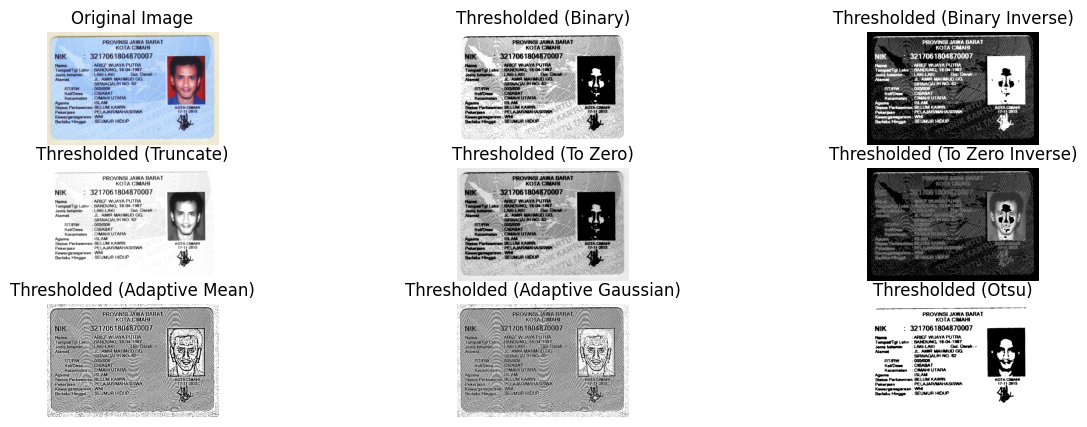

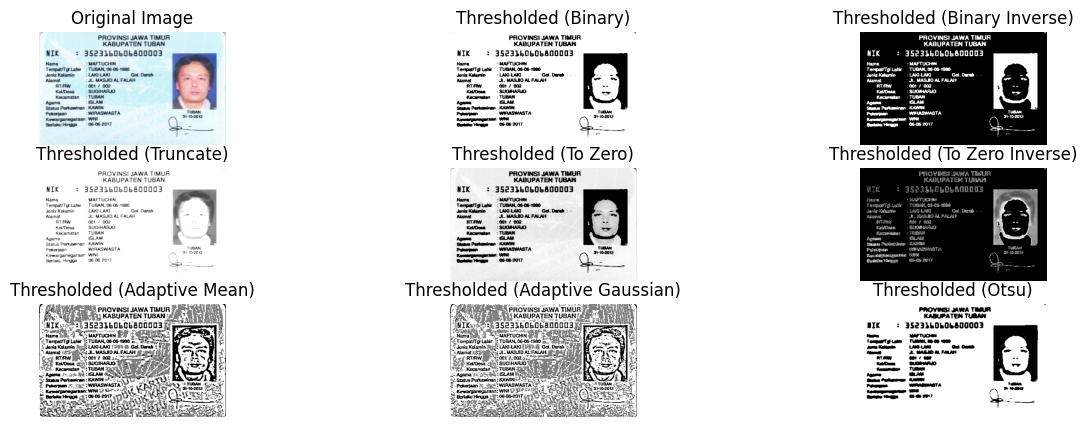

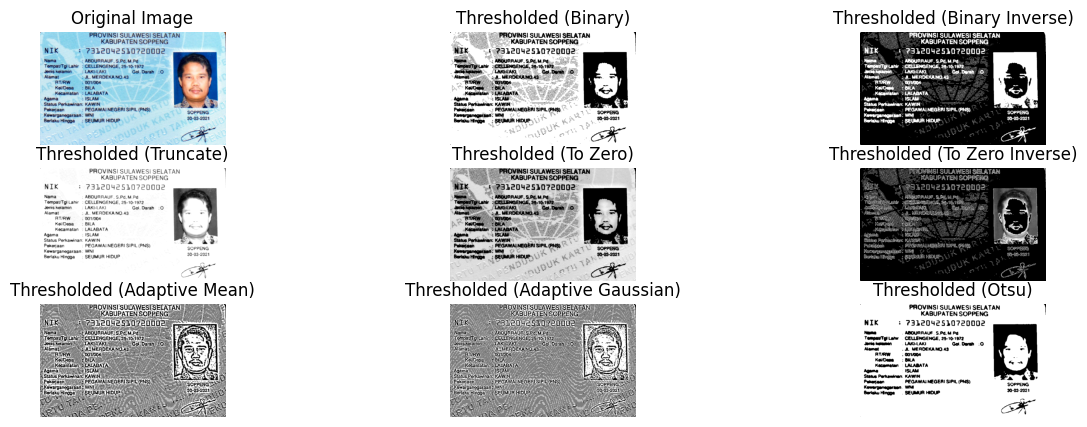

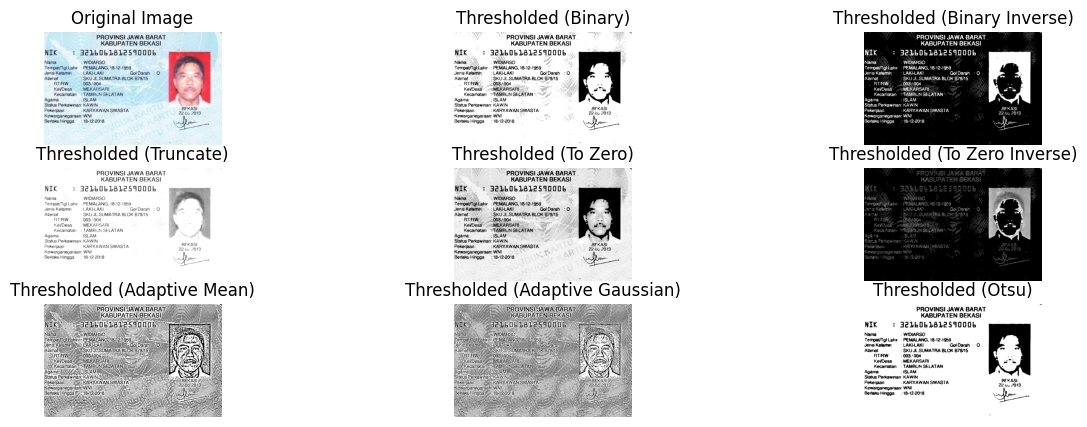

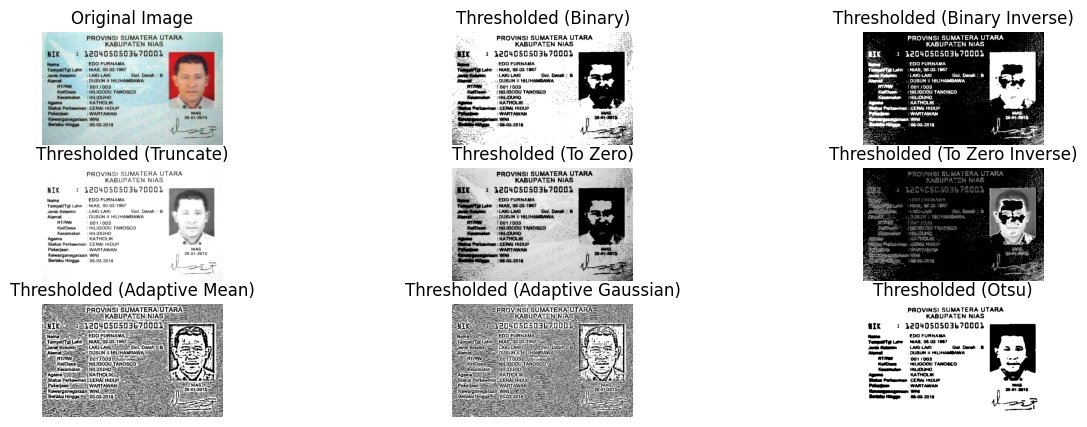

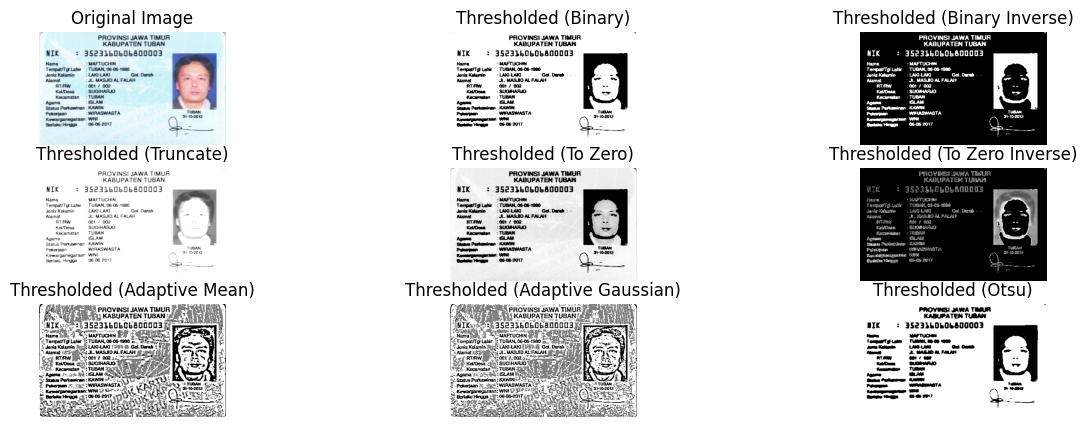

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing KTP images
folder_path = '/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp'

# Get a list of image files in the folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Define the threshold value
threshold_value = 170  # You can adjust this threshold value

# Define a list of thresholding methods
threshold_methods = ['Binary', 'Binary Inverse', 'Truncate', 'To Zero', 'To Zero Inverse', 'Adaptive Mean', 'Adaptive Gaussian', 'Otsu']

# Iterate through KTP images
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)

    # Create a subplot for each thresholding method
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(3, 3, 1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(ktp_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY)

    # Apply different thresholding methods
    for j, method in enumerate(threshold_methods):
        # Apply thresholding
        if method == 'Binary':
            _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
        elif method == 'Binary Inverse':
            _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
        elif method == 'Truncate':
            _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_TRUNC)
        elif method == 'To Zero':
            _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_TOZERO)
        elif method == 'To Zero Inverse':
            _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_TOZERO_INV)
        elif method == 'Adaptive Mean':
            thresholded_image = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
        elif method == 'Adaptive Gaussian':
            thresholded_image = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
        elif method == 'Otsu':
            blur = cv.GaussianBlur(gray_image,(5,5),0)
            ret2,thresholded_image = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

        # Create a subplot for the thresholded image
        plt.subplot(3, 3, j + 2)
        plt.axis('off')
        plt.imshow(thresholded_image, cmap='gray')
        plt.title(f'Thresholded ({method})')

    plt.show()